## 1. Introduction
<p>Everyone, from children to adults, loves Lego.</p> 
<p>Did you know by the way that "Lego" was derived from the Danish phrase leg godt, which means "play well"?</p>
<p>The company was founded in 1932, and by 2015, The Lego Group surpassed Mattel to become the world's largest toy company by revenue.</p>
<p>In this project, we will analyze the entire collection of Lego blocks and sets ever released, to gain insights of the world of plastic bricks.</p>
<p><img src="datasets/lego.jpg" alt="lego"></p>

## 2. Reading Data
<p>A comprehensive database of lego blocks is provided by <a href="https://rebrickable.com/downloads/">Rebrickable</a>. The data is available as csv files.</p>
<p>Let's start by reading in the colors data to get a sense of the diversity of Lego blocks!</p>

In [11]:
# Import pandas
import pandas as pd
%matplotlib inline

# Read colors data as 'colors'
colors = pd.read_csv('datasets/colors.csv')

# Print the first few rows
colors.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


## 3. Exploring Colors
<p>Now that we have read the <code>colors</code> data, we can start exploring it! Let's start by understanding the number of colors available.</p>

In [12]:
# Find the number of distinct colors
num_colors = colors.rgb.count()

# Print number of distinct colors
num_colors

139

## 4. Transparent Colors in Lego Sets
<p>The <code>colors</code> data has a column named <code>is_trans</code> that indicates whether a color is transparent or not. It would be interesting to explore the distribution of transparent vs. non-transparent colors.</p>

In [13]:
# colors_summary: Distribution of colors based on transparency
colors_summary = colors.groupby('is_trans').count()

# Print the distribution of colors based on transparency
colors_summary

,id,name,rgb
is_trans,,,
f,111,111,111
t,28,28,28


<p>Interestingly, approximately 20% of the colors are transparent. I certainly didn't expect such a high percentage of transparent colors.</p>

## 5. Explore Lego Sets
<p>Another interesting dataset available in this database is the <code>sets</code> data. It contains a comprehensive list of sets over the years and the number of parts that each of these sets contained. </p>

In [14]:
# Read sets data as 'sets'
sets = pd.read_csv('datasets/sets.csv')

# Print the first few rows
sets.head()

,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,001-1,Gears,1965,1,43
2,0011-2,Town Mini-Figures,1978,84,12
3,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
4,0012-1,Space Mini-Figures,1979,143,12


## 6. The First Sets
<p>Let's use this data to explore all the Lego sets ever released.</p>

In [15]:
# Finds the Lego sets released in the first year
sets[sets.year == sets.year.min()]

,set_num,name,year,theme_id,num_parts
7731,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
7744,700.2-1,Large Gift Set (ABB),1949,365,178
7749,700.3-1,Medium Gift Set (ABB),1949,365,142
7754,700.A-1,Small Brick Set (ABB),1949,371,24
7755,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


<p>Set 700.1-1. One of the very first Lego set released in 1949.</p>
<p><img src="datasets/set_700_1-1.png" alt="set 700.1-1"></p>

## 7. The Largest Sets

<p>Next we'll look at the largest sets.</p>

In [16]:
# Print the first 3 rows of the DataFrame in descending number of parts
sets.sort_values('num_parts', ascending = False).head(3)

,set_num,name,year,theme_id,num_parts
9140,75192-1,UCS Millennium Falcon,2017,171,7541
264,10256-1,Taj Mahal - 2017 Version,2017,43,5923
196,10189-1,Taj Mahal,2008,276,5922


<p>The award for the largest set goes to set 75192: Millennium Falcon.</p>

<p>It has staggering 7,541 parts, with the second largest set trailing by more than 1,500 parts!</p>
<p><img src="datasets/set_75192-1.jpg" alt="set_75192-1"></p>

## 8. Number of Lego Sets Over Years
<p> Now to explore some time series.</p>
<p>We'll look at the number of sets released over the years.</p>

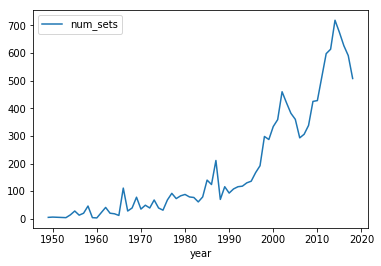

In [17]:
# Create a summary of number of sets per year: 'sets_by_year'
sets_by_year = sets[['year', 'set_num']].groupby('year').count().rename(columns={'set_num':'num_sets'})

# Plot number of sets by year
sets_by_year.plot()

Wow, Lego increases the number of sets released significantly from 2000. More sets more revenue, I suppose?

## 9. Number of Parts Over Years
<p>What about the number of parts in each set over the years?</p>

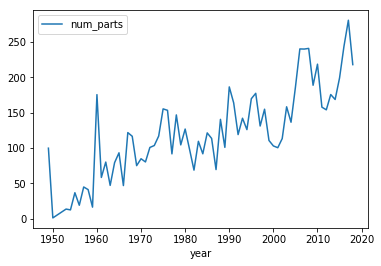

In [18]:
# Create a summary of average number of parts by year: 'parts_by_year'
parts_by_year = sets[['year', 'num_parts']].groupby('year').mean()

# Plot average number of parts by year
parts_by_year.plot()

Hmm, the average number of parts for each Lego set increases over the years too.

## 10. Lego Themes Over Years
<p>Lego sets ship under multiple <a href="https://shop.lego.com/en-US/Themes">themes</a> such as Star Wars and Disney. Let's try to get a sense of how the number of themes shipped has varied over the years.</p>

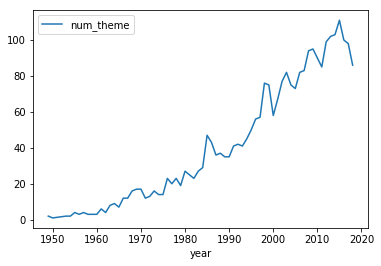

In [19]:
# themes_by_year: Number of themes shipped by year
themes_by_year = sets[['year', 'theme_id']].groupby('year').agg({'theme_id': pd.Series.nunique}).\
    rename(columns={'theme_id':'num_theme'})

# Plot number of themes by year
themes_by_year.plot()

## 11. Conclusion
<p>Lego blocks offer an unlimited amount of fun across ages.</p>
<p>We explored some interesting trends around colors, sets, parts, and themes.</p>
<p>It also seems that the success of The Lego Group has been helped by more sets, more parts and more themes!</p>
<p><img src = "datasets/lego_blocks.jpg" alt = "lego blocks"></p>